# San Francisco Airport Clustering

In this project, I will cluster planes using data from San Francisco Airport. I will utilize K-Means Clustering and Yellowbrick (specifically the Elbow Method) to visualize the data and determine the optimal number of clusters. Unlike classification and regression, clustering does not involve a dependent variable ("y"); instead, it relies solely on independent variables ("x"). In clustering, a target column such as "cluster" is created to assign each data point to a specific cluster.

In [1]:
#I am importing libraries
import pandas as pd
import yellowbrick
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data
df=pd.read_csv('air-traffic-passenger-statistics.csv')

# EDA

In [3]:
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804


In [4]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [5]:
df["GEO Summary"].unique()

array(['Domestic', 'International'], dtype=object)

## Feature Engineering

In [6]:
d={'Domestic':0,'International':1}

In [7]:
df["GEO Summary"]=df["GEO Summary"].map(d)

In [8]:
df["Activity Type Code"].value_counts()

Activity Type Code
Enplaned          8930
Deplaned          8909
Thru / Transit    1046
Name: count, dtype: int64

In [9]:
df["Price Category Code"].value_counts()

Price Category Code
Other       16521
Low Fare     2364
Name: count, dtype: int64

In [10]:
d2={'Other':1,'Low Fare':0}
df["Price Category Code"]=df["Price Category Code"].map(d2)

In [11]:
x=df[["Activity Period","GEO Summary","GEO Region","Price Category Code","Passenger Count"]]

In [12]:
x.head()

,Activity Period,GEO Summary,GEO Region,Price Category Code,Passenger Count
0,200507,0,US,0,27271
1,200507,0,US,0,29131
2,200507,0,US,0,5415
3,200507,1,Canada,1,35156
4,200507,1,Canada,1,34090


In [13]:
x["GEO Region"].value_counts()

GEO Region
US                     6981
Asia                   4073
Europe                 2803
Canada                 1794
Mexico                 1455
Australia / Oceania     951
Central America         383
Middle East             354
South America            91
Name: count, dtype: int64

In [14]:
x=pd.get_dummies(x)

In [15]:
x.head()

,Activity Period,GEO Summary,Price Category Code,Passenger Count,GEO Region_Asia,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US
0,200507,0,0,27271,False,False,False,False,False,False,False,False,True
1,200507,0,0,29131,False,False,False,False,False,False,False,False,True
2,200507,0,0,5415,False,False,False,False,False,False,False,False,True
3,200507,1,1,35156,False,False,True,False,False,False,False,False,False
4,200507,1,1,34090,False,False,True,False,False,False,False,False,False


## Modelling

In [16]:
from sklearn.cluster import KMeans

In [17]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

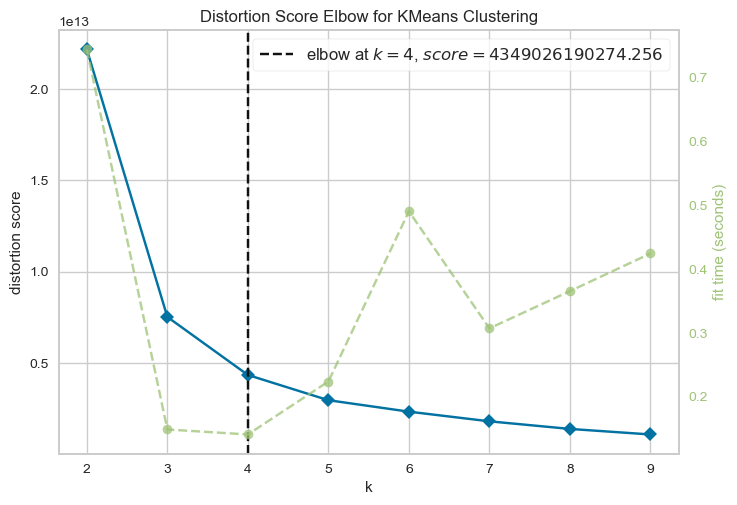

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
visualizer.fit(x)
visualizer.show()

In [19]:
model=KMeans(4)

In [20]:
model=model.fit(x)

In [21]:
tahmin=model.predict(x)

In [22]:
x["cluster"]=tahmin

In [23]:
x

,Activity Period,GEO Summary,Price Category Code,Passenger Count,GEO Region_Asia,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,cluster
0,200507,0,0,27271,False,False,False,False,False,False,False,False,True,3
1,200507,0,0,29131,False,False,False,False,False,False,False,False,True,3
2,200507,0,0,5415,False,False,False,False,False,False,False,False,True,3
3,200507,1,1,35156,False,False,True,False,False,False,False,False,False,0
4,200507,1,1,34090,False,False,True,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,201806,1,1,50,False,False,False,False,True,False,False,False,False,3
18881,201806,1,1,10868,False,False,True,False,False,False,False,False,False,3
18882,201806,1,1,11664,False,False,True,False,False,False,False,False,False,3
18883,201806,1,1,804,False,False,False,False,True,False,False,False,False,3


In [24]:
x["cluster"].value_counts()

cluster
3    15349
0     2007
2     1138
1      391
Name: count, dtype: int64

In [25]:
from sklearn.metrics import silhouette_score
silhouette_score(x,tahmin)

0.7852585464037398

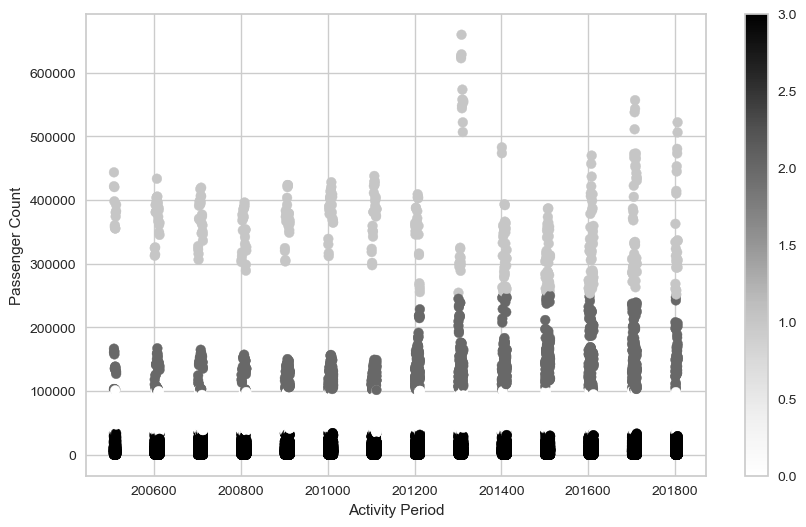

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(x["Activity Period"],x["Passenger Count"], c=tahmin)
plt.colorbar()
plt.xlabel("Activity Period")
plt.ylabel("Passenger Count");

To conclude, my model has identified 4 clusters. Above, I have created a graph illustrating these clusters based on activity period and passenger count. The silhouette score of my model is 0.7852585464037398, indicating that it effectively clusters the data. It's intriguing to observe how computers and algorithms can swiftly comprehend and categorize data.